## Simple Gaussians

First import some modules.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

Now make two arrays: one with coordinates on the x-axis and the other with coordinates on the y axis.

In [2]:
xs = np.linspace(-4, 4, num=300)
ys = np.exp(-(xs**2/2))


Now plot it!

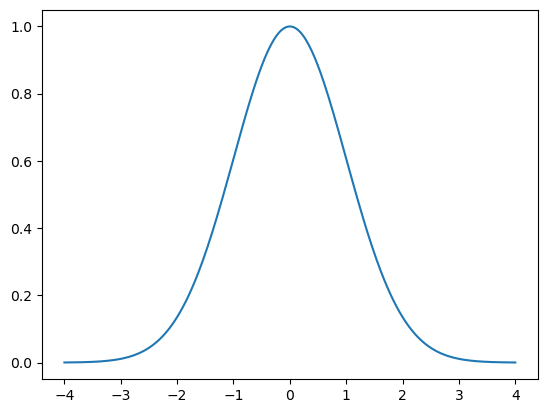

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=1)
axs.plot(xs, ys)

Now make an animation

In [4]:
# dpi = 100
# width = 1920 * 1 / 3 / 100
# height = 1080 * 2 / 3 / 100
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(width, height), dpi=dpi)

# line2 = axs.plot(xs[0], ys[0])[0]
# axs.set(xlim=[-4, 4], ylim=[0, 1.1])

# def update(frame):
#     line2.set_xdata(xs[:frame])
#     line2.set_ydata(ys[:frame])
#     return line2,

# ani = animation.FuncAnimation(fig=fig, func=update, frames=300, interval=30)
# ani.save(filename=os.path.join("output", "ffmpeg_example.mp4"), writer="ffmpeg")

Now make a custom background color!

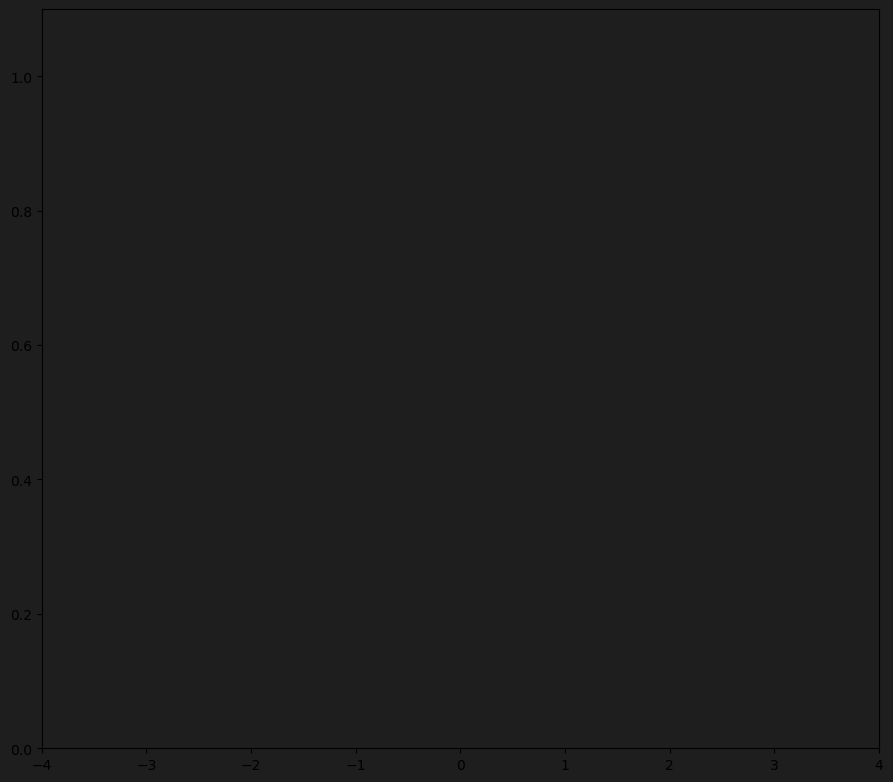

In [19]:
dpi = 100
width = 1080 / dpi
height = 1920 / 2 / dpi
bgcolor = "#1E1E1E"
line_color = "#FFFFFF"

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(width, height), dpi=dpi)
axs.set_facecolor(bgcolor)
fig.set_facecolor(bgcolor)
line2 = axs.plot(xs[0], ys[0], color=line_color, lw=5, solid_capstyle="round")[0]
axs.set(xlim=[-4, 4], ylim=[0, 1.1])

def update(frame):
    line2.set_xdata(xs[:frame])
    line2.set_ydata(ys[:frame])
    return line2,

ani = animation.FuncAnimation(fig=fig, func=update, frames=330, interval=33)
ani.save(filename=os.path.join("output", "single_gaussian.mp4"), writer="ffmpeg")